Telecom X - Análise de Evasão de Clientes

Você foi contratado como assistente de análise de dados na Telecom X e fará parte do projeto "Churn de Clientes". A empresa enfrenta um alto índice de cancelamentos e precisa entender os fatores que levam à perda de clientes.

Seu desafio será coletar, tratar e analisar os dados, utilizando Python e suas principais bibliotecas para extrair insights valiosos. A partir da sua análise, os demais colegas da equipe de Data Science poderá avançar para modelos preditivos e desenvolver estratégias para reduzir a evasão.

O que você vai praticar:

✅ Importar e manipular dados de uma API de forma eficiente. ✅ Aplicar os conceitos de ETL (Extração, Transformação e Carga) na preparação dos dados. ✅ Criar visualizações de dados estratégicas para identificar padrões e tendências. ✅ Realizar uma Análise Exploratória de Dados (EDA) e gerar um relatório com insights relevantes.

Agora é sua vez! 🚀 Use seus conhecimentos para transformar dados brutos em informações estratégicas e ajudar a Telecom X a reter mais clientes.

#📌 Importação

✅ Carregar os dados diretamente da API utilizando Python.
✅ Converter os dados para um DataFrame do Pandas para facilitar a manipulação.

In [ ]:
# importação de bibliotecas
# pandas
import pandas as pd
from pandas import json_normalize

# numpy
import numpy as np

### Executa somente nos processos de análise e manutenção

In [ ]:
#  Leitura do arquivo no formato JSON e o converte em um DataFrame do pandas.
df_normalizado = pd.read_json('/content/TelecomX_normalizado.json2', lines=True)
df_normalizado.head()

,id.cliente,contrato.ativo,cliente.genero,cliente.idoso,cliente.casado,cliente.dependentes,cliente.tempo.contrato,fone.assinatura,fone.assinatura.adicional,internet.assinatura,...,internet.protecao.dispositivo,internet.suporte,internet.streaming.tv,internet.streamingtv.filmes,conta.tipo.contrato,conta.fatura.digital,conta.metodo.pagamento,conta.valor.mensal,conta.valor.total.acumulado,conta.valor.diario
0,0002-ORFBO,0,female,0,1,1,9,1,0,dsl,...,0,1,1,0,one year,1,mailed check,65.6,593.30,2.155059
1,0003-MKNFE,0,male,0,0,0,9,1,1,dsl,...,0,0,0,1,month-to-month,0,mailed check,59.9,542.40,1.967806
2,0004-TLHLJ,1,male,0,0,0,4,1,0,fiber optic,...,1,0,0,0,month-to-month,1,electronic check,73.9,280.85,2.427727
3,0011-IGKFF,1,male,1,1,0,13,1,0,fiber optic,...,1,0,1,1,month-to-month,1,electronic check,98.0,1237.85,3.219448
4,0013-EXCHZ,1,female,1,1,0,3,1,0,fiber optic,...,0,1,1,0,month-to-month,1,mailed check,83.9,267.40,2.756242


#### Dicionário de dados

* `customerID`: número de identificação único de cada cliente
* `Churn`: se o cliente deixou ou não a empresa
* `gender`: gênero (masculino e feminino)
* `SeniorCitizen`: informação sobre um cliente ter ou não idade igual ou maior que 65 anos
* `Partner`:  se o cliente possui ou não um parceiro ou parceira
* `Dependents`: se o cliente possui ou não dependentes
* `tenure`:  meses de contrato do cliente
* `PhoneService`: assinatura de serviço telefônico
* `MultipleLines`: assinatura de mais de uma linha de telefone
* `InternetService`: assinatura de um provedor internet
* `OnlineSecurity`: assinatura adicional de segurança online
* `OnlineBackup`: assinatura adicional de backup online
* `DeviceProtection`: assinatura adicional de proteção no dispositivo
* `TechSupport`: assinatura adicional de suporte técnico, menos tempo de espera
* `StreamingTV`: assinatura de TV a cabo
* `StreamingMovies`: assinatura de streaming de filmes
* `Contract`: tipo de contrato
* `PaperlessBilling`: se o cliente prefere receber online a fatura
* `PaymentMethod`: forma de pagamento
* `Charges.Monthly`: total de todos os serviços do cliente por mês
* `Charges.Total`: total gasto pelo cliente

#📊 Carga e análise

In [ ]:
# Importando bibliotecas
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier

Para uma análise descritiva dos dados, calculamos métricas como média, mediana, desvio padrão, e outras medidas que ajudem a entender melhor a distribuição e comportamento dos clientes.

In [ ]:
df_normalizado.describe()

,contrato.ativo,cliente.idoso,cliente.casado,cliente.dependentes,cliente.tempo.contrato,fone.assinatura,fone.assinatura.adicional,internet.seguranca,internet.backup,internet.protecao.dispositivo,internet.suporte,internet.streaming.tv,internet.streamingtv.filmes,conta.fatura.digital,conta.valor.mensal,conta.valor.total.acumulado,conta.valor.diario
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.265370,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353,0.387903,0.592219,64.761692,2279.734304,2.127519
std,0.441561,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477,0.487307,0.491457,30.090047,2266.794470,0.988504
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,18.250000,0.000000,0.599540
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,35.500000,398.550000,1.166229
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,70.350000,1394.550000,2.311104
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,89.850000,3786.600000,2.951708
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,118.750000,8684.800000,3.901117


# Gráficos para análise

### Percentual de Churn por Cliente

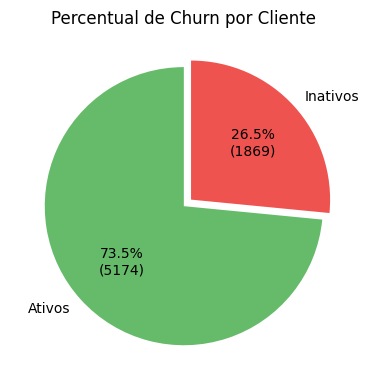

In [ ]:
churn_counts = df_normalizado['contrato.ativo'].value_counts()
labels = ['Ativos' if val == 0 else 'Inativos' for val in churn_counts.index]

# Função que formata percentual + quantidade absoluta
def func(pct, allvals):
    absolute = int(round(pct/100.*sum(allvals)))
    return f"{pct:.1f}%\n({absolute:d})"

# Explode a primeira fatia (Inativos, ou churn == 0)
explode = [0.07 if label == 'Inativos' else 0 for label in labels]

plt.figure(figsize=(6, 4))
plt.pie(
    churn_counts,
    labels=labels,
    autopct=lambda pct: func(pct, churn_counts),
    colors=['#66bb6a', '#ef5350'],  # vermelho = inativo, verde = ativo
    explode=explode,
    startangle=90
)
plt.title('Percentual de Churn por Cliente')
plt.tight_layout()

plt.savefig('Percentual de Churn por Cliente.png', dpi=300, bbox_inches='tight')

plt.show()

### Proporção de Evasão por Categoria

Agora, vamos explorar como a evasão se distribui de acordo com variáveis categóricas, como gênero, tipo de contrato, método de pagamento, entre outras.

Essa análise pode revelar padrões interessantes, como, por exemplo, se clientes de determinados perfis têm maior tendência a cancelar o serviço, o que ajudará a direcionar ações estratégicas.

In [ ]:
def formatar_grafico(axs):
    ax = axs  #[posicao[0], posicao[1]]

    ax.set_ylabel('Número de Clientes', fontsize=9)
    ax.xaxis.label.set_visible(False)
    ax.yaxis.set_tick_params(labelsize=9)
    ax.xaxis.set_tick_params(labelsize=9)
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    ax.grid(which='major', axis='y', color='gray', linestyle='--', linewidth=0.5, alpha=0.3)
    ax.set_xticklabels(ax.get_xticklabels(), rotation=0)

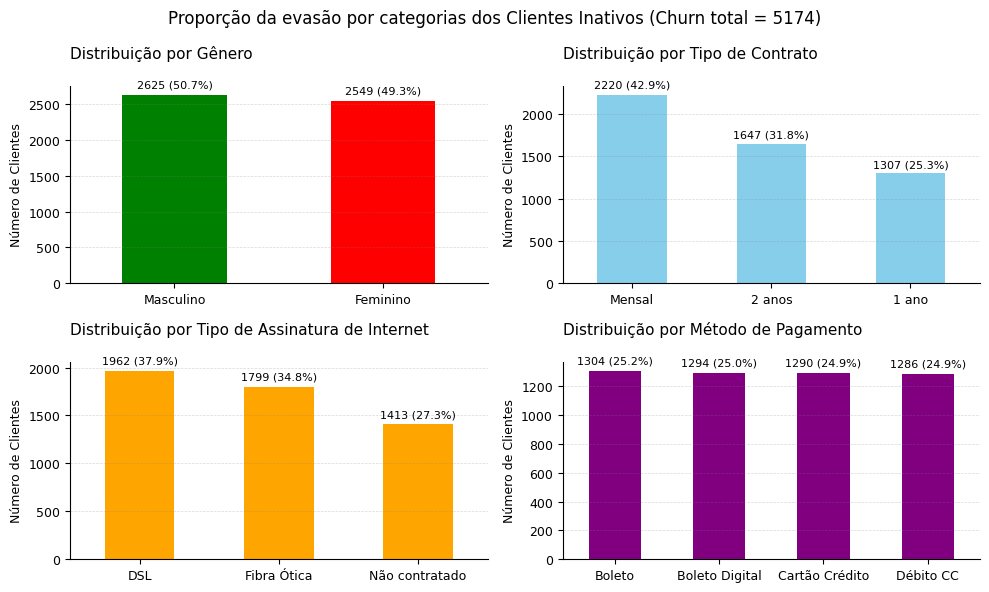

In [ ]:
# calcula o total de contratos inativos = churn
churn_total = df_normalizado[df_normalizado['contrato.ativo'] == 0].shape[0]

figs, axs = plt.subplots(2, 2, figsize=(10, 6))
figs.subplots_adjust(hspace=0.4, wspace=0.3)
figs.suptitle(f'Proporção da evasão por categorias dos Clientes Inativos (Churn total = {churn_total})')

# 1. Churn por gênero
generos = df_normalizado[df_normalizado['contrato.ativo'] == 0]['cliente.genero'].value_counts() # contagem contratos inativos por genero
total_cat = generos.sum()
generos.plot(kind='bar', ax=axs[0,0], color=['green','red'])
axs[0,0].set_title('Distribuição por Gênero', fontsize=11, loc='left', pad=20)
axs[0,0].set_xticklabels(['Masculino', 'Feminino'])
# Adiciona rótulo com valor e percentual em cada barra
for i, valor in enumerate(generos):
    percentual = valor / total_cat * 100
    deslocamento = valor * 0.03  # 3% acima da barra
    axs[0,0].text(i, valor + deslocamento, f'{valor} ({percentual:.1f}%)',
                  ha='center', va='bottom', fontsize=8)
# formata demais elementos do gráfico
formatar_grafico(axs[0, 0])


# 2. Distribuição dos contratos
tp_contratos = df_normalizado[df_normalizado['contrato.ativo'] == 0]['conta.tipo.contrato'].value_counts() # contagem contratos inativos por tipo de contrato
total_cat = tp_contratos.sum()
tp_contratos.plot(kind='bar', ax=axs[0,1], color='skyblue')
axs[0,1].set_title('Distribuição por Tipo de Contrato', fontsize=11, loc='left', pad=20)
axs[0,1].set_xticklabels(['Mensal', '2 anos', '1 ano'])
# Adiciona rótulo com valor e percentual em cada barra
for i, valor in enumerate(tp_contratos):
    percentual = valor / total_cat * 100
    deslocamento = valor * 0.03  # 3% acima da barra
    axs[0,1].text(i, valor + deslocamento, f'{valor} ({percentual:.1f}%)',
                  ha='center', va='bottom', fontsize=8)
# formata demais elementos do gráfico
formatar_grafico(axs[0,1])


# 3. Clientes por tipo de assinatura
internet = df_normalizado[df_normalizado['contrato.ativo'] == 0]['internet.assinatura'].value_counts() # contagem contratos inativos por assinatura de internet
total_cat = generos.sum()
internet.plot(kind='bar', ax=axs[1,0], color='orange')
axs[1,0].set_title('Distribuição por Tipo de Assinatura de Internet', fontsize=11, loc='left', pad=20)
axs[1,0].set_xticklabels(['DSL', 'Fibra Ótica', 'Não contratado'])
# Adiciona rótulo com valor e percentual em cada barra
for i, valor in enumerate(internet):
    percentual = valor / total_cat * 100
    deslocamento = valor * 0.03  # 3% acima da barra
    axs[1,0].text(i, valor + deslocamento, f'{valor} ({percentual:.1f}%)',
                  ha='center', va='bottom', fontsize=8)
# formata demais elementos do gráfico
formatar_grafico(axs[1,0])


# 4. Método de Pagamento
metodo_pg = df_normalizado[df_normalizado['contrato.ativo'] == 0]['conta.metodo.pagamento'].value_counts() # contagem contratos inativos por metodo de pagamento
total_cat = generos.sum()
metodo_pg.plot(kind='bar', ax=axs[1,1], color='purple')
axs[1,1].set_title('Distribuição por Método de Pagamento', fontsize=11, loc='left', pad=20)
axs[1,1].set_xticklabels(['Boleto', 'Boleto Digital', 'Cartão Crédito', 'Débito CC'])
# Adiciona rótulo com valor e percentual em cada barra
for i, valor in enumerate(metodo_pg):
    percentual = valor / total_cat * 100
    deslocamento = valor * 0.03  # 3% acima da barra
    axs[1,1].text(i, valor + deslocamento, f'{valor} ({percentual:.1f}%)',
                  ha='center', va='bottom', fontsize=8)
# formata demais elementos do gráfico
formatar_grafico(axs[1,1])

plt.tight_layout()

plt.savefig('Proporção da evasão por categorias dos Clientes Inativos.png', dpi=300, bbox_inches='tight')

plt.show()

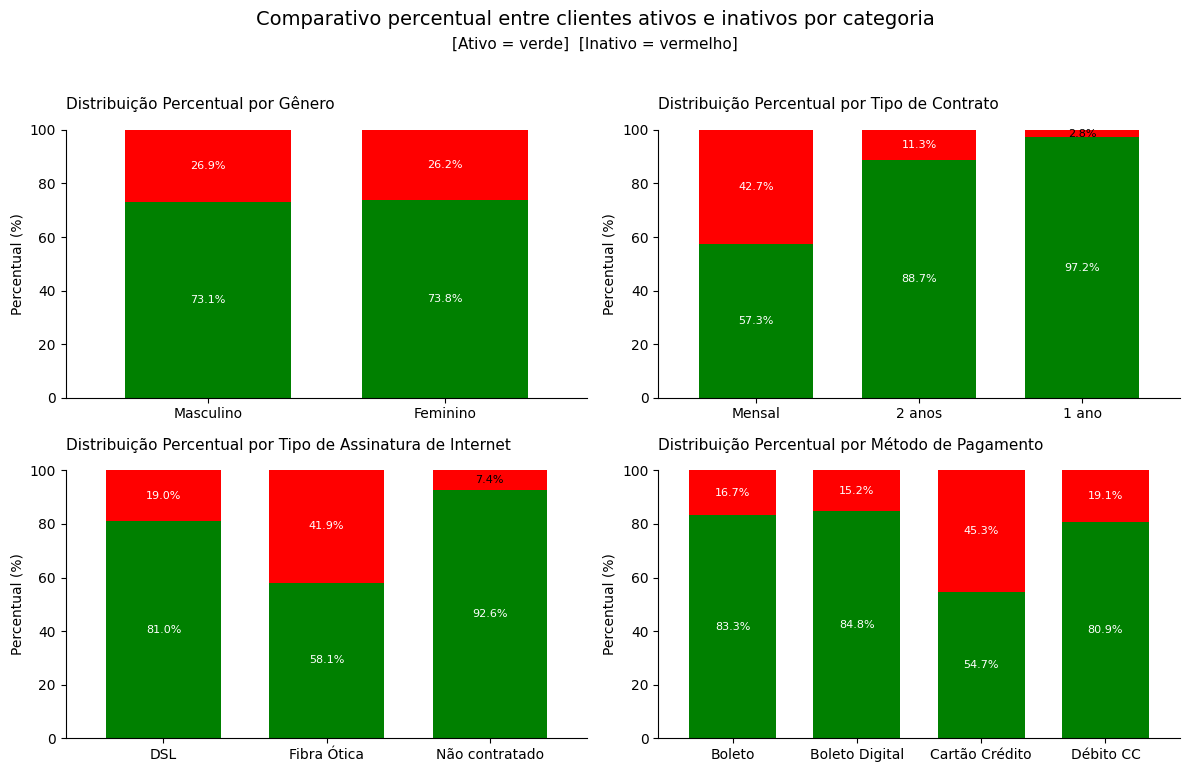

In [ ]:
# Totais para o título geral
ativos_total = df_normalizado[df_normalizado['contrato.ativo'] == 1].shape[0]
inativos_total = df_normalizado[df_normalizado['contrato.ativo'] == 0].shape[0]

# Layout do gráfico
figs, axs = plt.subplots(2, 2, figsize=(12, 8))
figs.subplots_adjust(hspace=0.5, wspace=0.3)

# Legenda clara no título geral (sem símbolos para evitar problema de fonte)
figs.text(0.5, 0.97, f'Comparativo percentual entre clientes ativos e inativos por categoria' ,
          fontsize=14, ha='center')

# Texto normal (subtítulo)
figs.text(0.5, 0.94, '[Ativo = verde]  [Inativo = vermelho]',
          fontsize=11, ha='center')


def plot_empilhado_percentual(ax, df, coluna, titulo, rotulos=None, cores=('green', 'red')):
    # Agrupa e transforma em percentual por categoria (linha)
    comparativo = df.groupby([coluna, 'contrato.ativo']).size().unstack().fillna(0)
    comparativo.columns = ['Ativos', 'Inativos']
    comparativo_perc = comparativo.div(comparativo.sum(axis=1), axis=0) * 100

    # Gráfico empilhado
    barras = comparativo_perc.plot(kind='bar', stacked=True, ax=ax, color=cores, width=0.7)

    if rotulos:
        ax.set_xticklabels(rotulos, rotation=0)
    ax.set_ylabel('Percentual (%)')
    ax.set_ylim(0, 100)

    # Define título (sem legenda)
    ax.set_title(titulo, fontsize=11, loc='left', pad=15)
    ax.xaxis.label.set_visible(False)

    # Remove bordas superior e direita (spines)
    ax.spines['right'].set_visible(False)
    ax.spines['top'].set_visible(False)

    # Adiciona rótulo de percentual sobre cada fatia
    for i, (idx, row) in enumerate(comparativo_perc.iterrows()):
        cumul = 0
        for val in row:
            if val > 0:
                xpos = i
                ypos = cumul + val / 2
                ax.text(
                    xpos,
                    ypos,
                    f'{val:.1f}%',
                    ha='center',
                    va='center',
                    fontsize=8,
                    color='white' if val > 10 else 'black'
                )
                cumul += val

    # Remove legenda automática (se existir)
    ax.legend().remove()

# 1. Gênero
plot_empilhado_percentual(
    axs[0, 0],
    df_normalizado,
    'cliente.genero',
    'Distribuição Percentual por Gênero',
    rotulos=['Masculino', 'Feminino']
)

# 2. Tipo de contrato
plot_empilhado_percentual(
    axs[0, 1],
    df_normalizado,
    'conta.tipo.contrato',
    'Distribuição Percentual por Tipo de Contrato',
    rotulos=['Mensal', '2 anos', '1 ano']
)

# 3. Tipo de assinatura de internet
plot_empilhado_percentual(
    axs[1, 0],
    df_normalizado,
    'internet.assinatura',
    'Distribuição Percentual por Tipo de Assinatura de Internet',
    rotulos=['DSL', 'Fibra Ótica', 'Não contratado']
)

# 4. Método de pagamento
plot_empilhado_percentual(
    axs[1, 1],
    df_normalizado,
    'conta.metodo.pagamento',
    'Distribuição Percentual por Método de Pagamento',
    rotulos=['Boleto', 'Boleto Digital', 'Cartão Crédito', 'Débito CC']
)

plt.tight_layout(rect=[0, 0.03, 1, 0.9])  # espaço para título geral e legenda

plt.savefig('Comparativo Percentual entre Clientes Ativos e Inativos por categoria.png', dpi=300, bbox_inches='tight')
plt.show()


### Distribuição de evasão por Tempo de Serviço

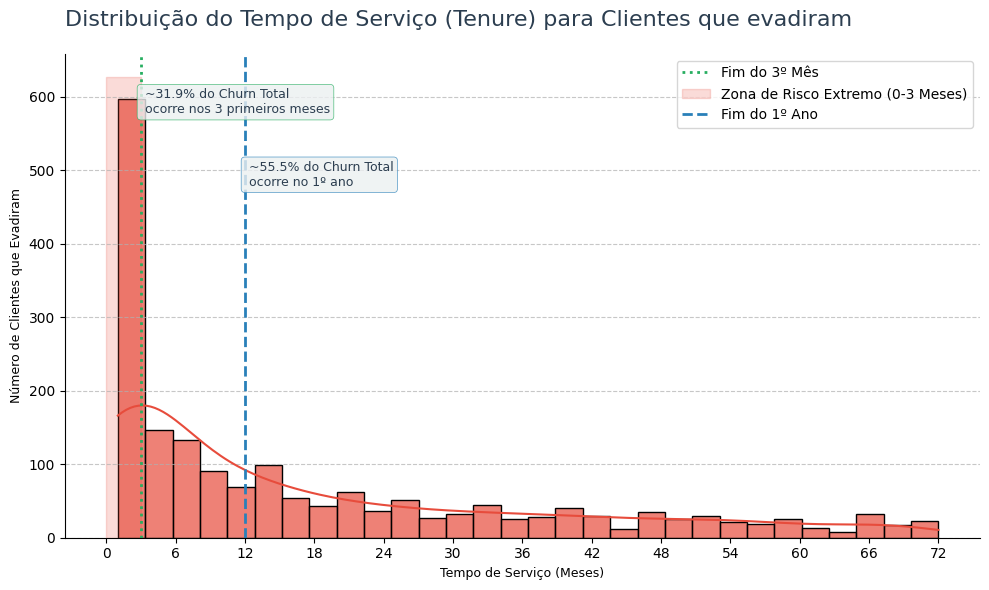

In [ ]:
# Filtrar apenas os clientes que evadiram (Churn = 1)
df_churned = df_normalizado[df_normalizado['contrato.ativo'] == 1]

plt.figure(figsize=(10, 6))

# Histograma do tempo de contrato dos churns
sns.histplot(data=df_churned, x='cliente.tempo.contrato', bins=30, kde=True,
             color='#e74c3c', alpha=0.7)  # vermelho

# Cálculo de percentuais
total_churners = len(df_churned)
churners_0_3_months = df_churned[df_churned['cliente.tempo.contrato'] <= 3].shape[0]
percent_churn_0_3_months = (churners_0_3_months / total_churners) * 100

churners_0_12_months = df_churned[df_churned['cliente.tempo.contrato'] <= 12].shape[0]
percent_churn_0_12_months = (churners_0_12_months / total_churners) * 100

# Linhas e áreas de destaque
plt.axvline(x=3, color='#27ae60', linestyle=':', linewidth=2, label='Fim do 3º Mês')  # verde
plt.fill_betweenx(y=[0, plt.gca().get_ylim()[1]], x1=0, x2=3,
                  color='#e74c3c', alpha=0.2, label='Zona de Risco Extremo (0-3 Meses)')  # vermelho claro

plt.axvline(x=12, color='#2980b9', linestyle='--', linewidth=2, label='Fim do 1º Ano')  # azul

# Anotações
max_y_val = plt.gca().get_ylim()[1]

plt.text(x=3, y=max_y_val * 0.9,
         s=f' ~{percent_churn_0_3_months:.1f}% do Churn Total\n ocorre nos 3 primeiros meses',
         color='#2c3e50',  # texto escuro
         ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.3", fc='#ecf0f1', ec='#27ae60', lw=0.5, alpha=0.8),
         fontsize=9)

plt.text(x=12, y=max_y_val * 0.75,
         s=f' ~{percent_churn_0_12_months:.1f}% do Churn Total\n ocorre no 1º ano',
         color='#2c3e50',
         ha='left', va='center',
         bbox=dict(boxstyle="round,pad=0.3", fc='#ecf0f1', ec='#2980b9', lw=0.5, alpha=0.8),
         fontsize=9)

# Título e eixos
plt.title('Distribuição do Tempo de Serviço (Tenure) para Clientes que evadiram',
          fontsize=16, pad=20, loc='left', color='#2c3e50')
plt.xlabel('Tempo de Serviço (Meses)', fontsize=9)
plt.ylabel('Número de Clientes que Evadiram', fontsize=9)
plt.xticks(range(0, int(df_churned['cliente.tempo.contrato'].max()) + 1, 6))
plt.legend(loc='upper right', fontsize=10)
ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

plt.savefig('Distribuição do Tempo de Serviço (Tenure) para Clientes que evadiram.png', dpi=300, bbox_inches='tight')

plt.show()

### Serviços contratados por clientes inativos com Internet ( DSL )

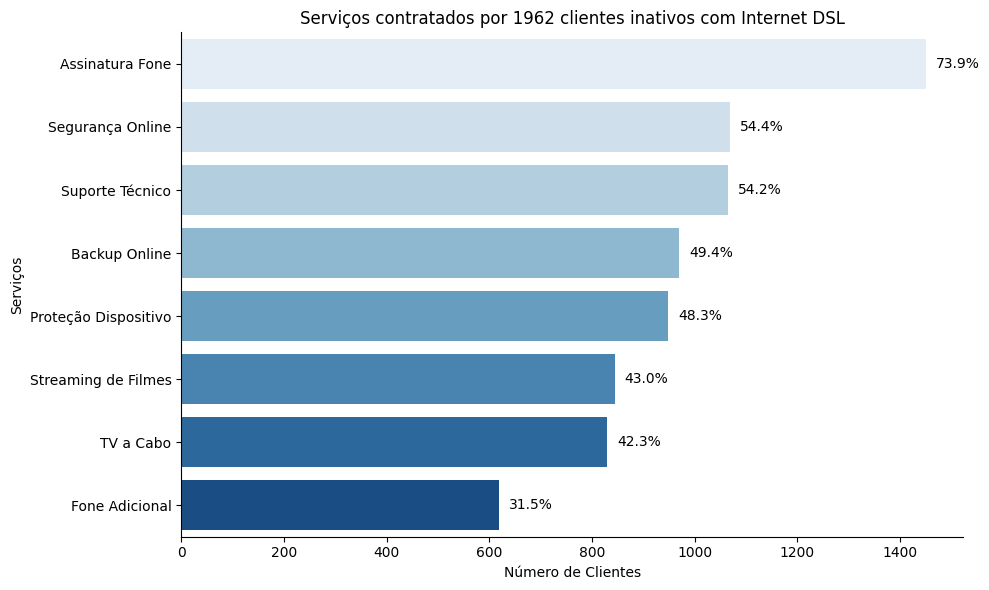

In [ ]:
# Lista de colunas de serviços relacionados a fone e internet
servicos_fone_internet = [
    'fone.assinatura',
    'fone.assinatura.adicional',
    'internet.seguranca',
    'internet.backup',
    'internet.protecao.dispositivo',
    'internet.suporte',
    'internet.streaming.tv',
    'internet.streamingtv.filmes'
]

# Filtra clientes inativos com internet DSL
df_filtrado = df_normalizado[(df_normalizado['contrato.ativo'] == 0) & (df_normalizado['internet.assinatura'] == 'dsl')].copy()

# Total de clientes nesse grupo
total_clientes = df_filtrado.shape[0]

# Converte colunas para numérico e trata possíveis erros
df_filtrado[servicos_fone_internet] = df_filtrado[servicos_fone_internet].apply(pd.to_numeric, errors='coerce').fillna(0)

# Soma dos serviços
servicos_ativos = df_filtrado[servicos_fone_internet].sum().sort_values(ascending=False)

# Cálculo dos percentuais
percentuais = (servicos_ativos / total_clientes * 100).round(1)

# Prepara DataFrame para usar hue com sns.barplot
df_plot = pd.DataFrame({
    'Serviço': servicos_ativos.index,
    'Clientes': servicos_ativos.values,
    'Percentual': percentuais.values
})

# Dicionário de nomes legíveis
nomes_legiveis = {
    'fone.assinatura': 'Assinatura Fone',
    'fone.assinatura.adicional': 'Fone Adicional',
    'internet.seguranca': 'Segurança Online',
    'internet.backup': 'Backup Online',
    'internet.protecao.dispositivo': 'Proteção Dispositivo',
    'internet.suporte': 'Suporte Técnico',
    'internet.streaming.tv': 'TV a Cabo',
    'internet.streamingtv.filmes': 'Streaming de Filmes'
}

# Substitui os nomes técnicos por nomes legíveis
df_plot['Serviço'] = df_plot['Serviço'].replace(nomes_legiveis)


# Gráfico com hue
plt.figure(figsize=(10, 6))
ax = sns.barplot(
    data=df_plot,
    x='Clientes',
    y='Serviço',
    hue='Serviço',
    dodge=False,
    palette=sns.color_palette("Blues", n_colors=len(df_plot)),
    legend=False
)

# Adiciona os percentuais ao lado das barras
for i, row in df_plot.iterrows():
    ax.text(row['Clientes'] + total_clientes * 0.01, i, f"{row['Percentual']}%", va='center')

# Título com total de clientes
plt.title(f'Serviços contratados por {total_clientes} clientes inativos com Internet DSL')
plt.xlabel('Número de Clientes')
plt.ylabel('Serviços')

ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.tight_layout()

plt.savefig('Serviços contratados por clientes inativos com Internet DSL.png', dpi=300, bbox_inches='tight')

plt.show()


### Perfil Demográfico dos Clientes Inativos


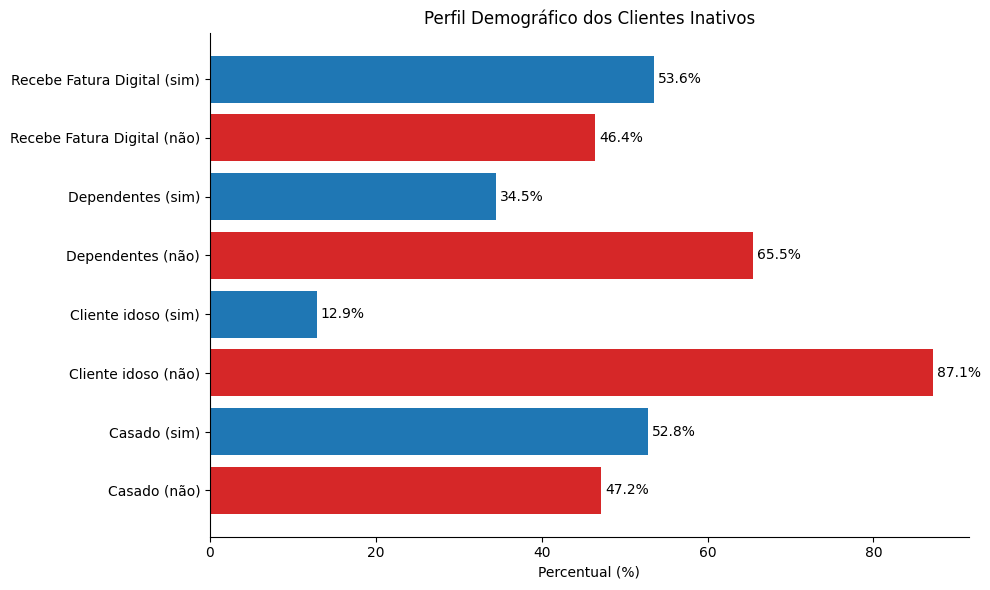

In [ ]:
# Filtrar apenas os clientes com contrato inativo
df_inativos = df_normalizado[df_normalizado['contrato.ativo'] == 0]

# Variáveis demográficas e seus rótulos
variaveis = {
    'cliente.idoso': 'Cliente idoso',
    'cliente.casado': 'Casado',
    'cliente.dependentes': 'Dependentes',
    'conta.fatura.digital': 'Recebe Fatura Digital'
}

# Preparar dados para o gráfico
dados_plot = []

for var, titulo in variaveis.items():
    porcentagens = df_inativos[var].value_counts(normalize=True) * 100


    for valor in [0, 1]:
        perc = porcentagens.loc[valor] if valor in porcentagens.index else 0
        resposta = 'sim' if valor == 1 else 'não'
        label = f"{titulo} ({resposta})"
        cor = '#1f77b4' if valor == 1 else '#d62728'  # Azul para sim, vermelho para não
        dados_plot.append((titulo, label, perc, cor))

# Criar DataFrame para plot
df_plot = pd.DataFrame(dados_plot, columns=['Grupo', 'Categoria', 'Percentual', 'Cor'])

# Ordenar para manter pares juntos
df_plot['Ordem'] = df_plot.groupby('Grupo').cumcount()
df_plot = df_plot.sort_values(by=['Grupo', 'Ordem'])

# Plotar gráfico
plt.figure(figsize=(10, 6))
plt.barh(df_plot['Categoria'], df_plot['Percentual'], color=df_plot['Cor'])

# Adicionar rótulos
for i, valor in enumerate(df_plot['Percentual']):
    plt.text(valor + 0.5, i, f'{valor:.1f}%', va='center')

plt.xlabel('Percentual (%)')
plt.title('Perfil Demográfico dos Clientes Inativos')
plt.tight_layout()


ax = plt.gca()
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)

plt.savefig('Perfil Demográfico dos Clientes Inativos.png', dpi=300, bbox_inches='tight')


plt.show()


### Correlação das Variáveis Binárias com Churn

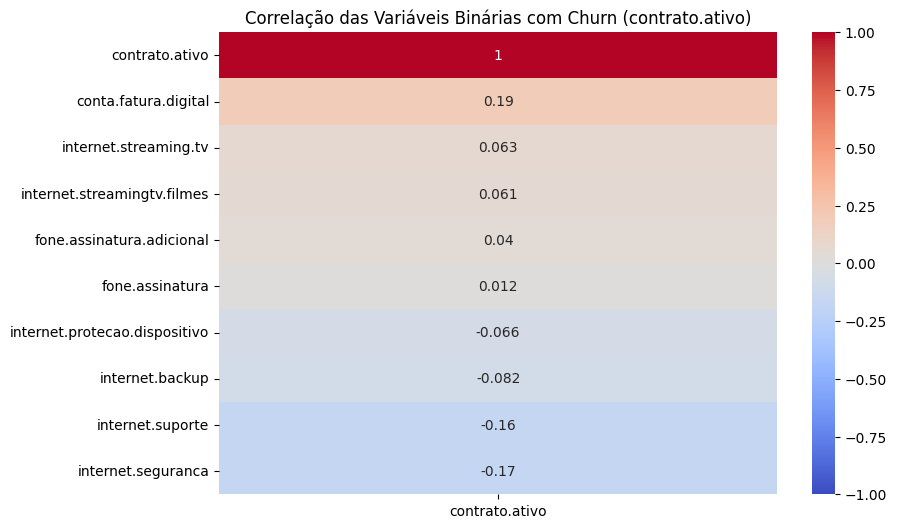

In [ ]:
# Lista das variáveis binárias conforme o dicionário de dados
binary_vars = [
    'fone.assinatura', 'fone.assinatura.adicional',
    'internet.seguranca', 'internet.backup', 'internet.protecao.dispositivo', 'internet.suporte',
    'internet.streaming.tv', 'internet.streamingtv.filmes', 'conta.fatura.digital'
]

# Subconjunto com variáveis binárias + contrato.ativo
correlation_vars = binary_vars + ['contrato.ativo']
corr = df_normalizado[correlation_vars].corr()

# Gerar o heatmap
plt.figure(figsize=(9, 6))
sns.heatmap(corr[['contrato.ativo']].sort_values(by='contrato.ativo', ascending=False),
            annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title('Correlação das Variáveis Binárias com Churn (contrato.ativo)')

plt.savefig('Correlação das Variáveis Binárias com Churn.png', dpi=300, bbox_inches='tight')

plt.show()

🔍 O que o gráfico mostra?
A correlação varia de -1 a 1:

- Próximo de +1: relação positiva forte – quanto maior a variável, maior a chance do cliente continuar.

- Próximo de -1: relação negativa forte – quanto maior a variável, maior a chance do cliente sair (churn).

- Próximo de 0: pouca ou nenhuma relação.

### Tempo de contrato vs. Valor total acumulado por churn

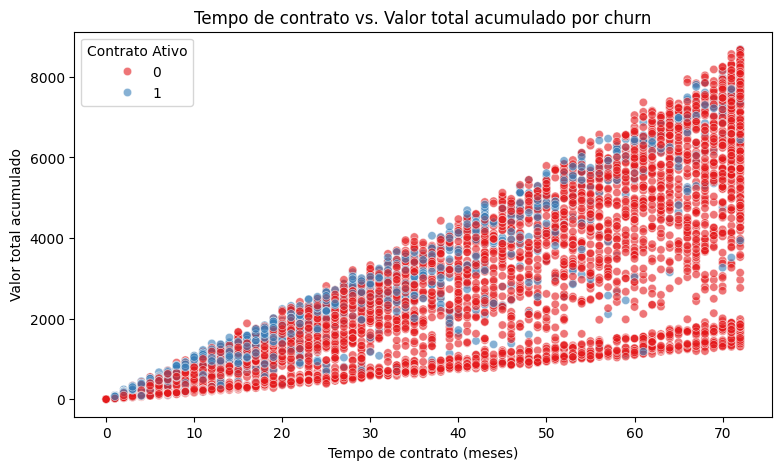

In [ ]:
plt.figure(figsize=(9, 5))
sns.scatterplot(
    x='cliente.tempo.contrato',
    y='conta.valor.total.acumulado',
    hue='contrato.ativo',
    data=df_normalizado,
    palette='Set1',
    alpha=0.6
)
plt.title('Tempo de contrato vs. Valor total acumulado por churn')
plt.xlabel('Tempo de contrato (meses)')
plt.ylabel('Valor total acumulado')
plt.legend(title='Contrato Ativo')

plt.savefig('Tempo de contrato vs. Valor total acumulado por churn.png', dpi=300, bbox_inches='tight')

plt.show()


### Mapa de Calor das Correlações

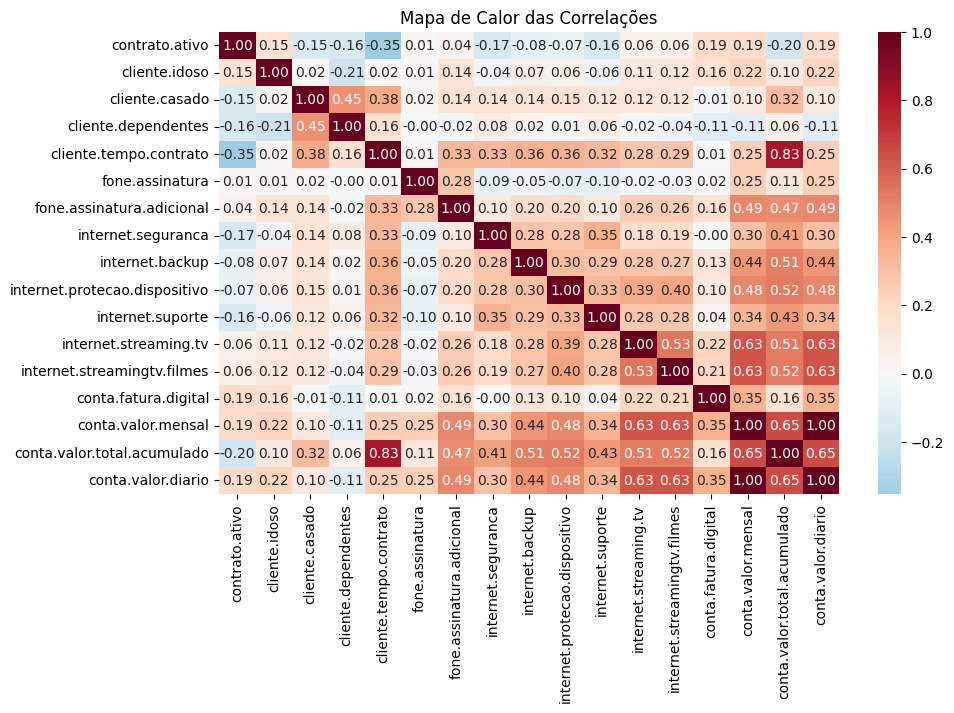

In [ ]:
# Seleciona apenas variáveis numéricas
df_numerico = df_normalizado.select_dtypes(include='number')

# Calcula correlação com o churn
correlacao = df_numerico.corr()

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlacao, annot=True, fmt=".2f", cmap='RdBu_r', center=0)
plt.title('Mapa de Calor das Correlações')

plt.savefig('Mapa de Calor das Correlações.png', dpi=300, bbox_inches='tight')

plt.show()


### Clusters de Clientes via K-Means + PCA

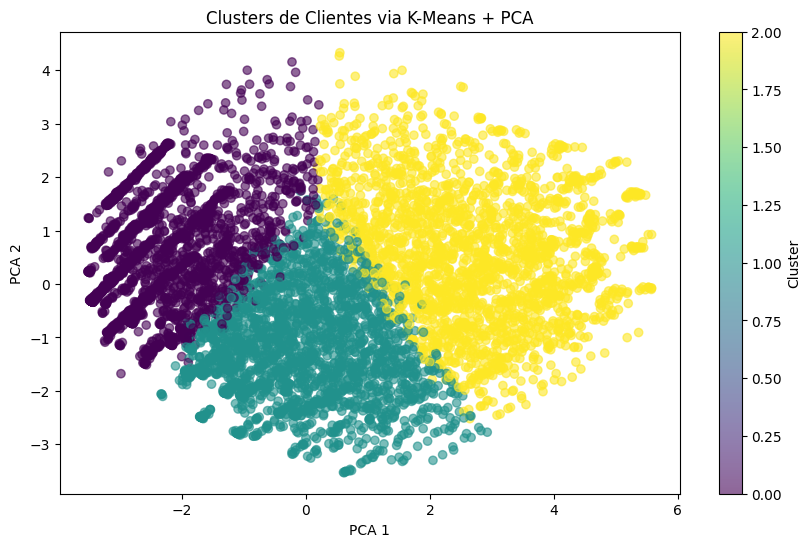

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.cluster import KMeans

# Seleciona variáveis numéricas e binárias (removendo ID e churn)
X = df_normalizado.drop(columns=['id.cliente', 'contrato.ativo'])

# Apenas colunas numéricas
X = X.select_dtypes(include='number')

# Normalização
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Redução de dimensão
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# K-Means
kmeans = KMeans(n_clusters=3, random_state=42)
labels = kmeans.fit_predict(X_scaled)

# Plot
plt.figure(figsize=(10, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=labels, cmap='viridis', alpha=0.6)
plt.title('Clusters de Clientes via K-Means + PCA')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')
plt.colorbar(label='Cluster')

plt.savefig('Clusters de Clientes via K-Means + PCA.png', dpi=300, bbox_inches='tight')

plt.show()


### Contagem de evasão das Variáveis Numéricas

Neste passo, explore como variáveis numéricas, como "total gasto" ou "tempo de contrato", se distribuem entre clientes que cancelaram (evasão) e os que não cancelaram.

Essa análise ajuda a entender se certos valores numéricos estão mais associados à evasão, oferecendo insights sobre os fatores que influenciam o comportamento dos clientes.

In [215]:
import plotly.express as px


nomes_legiveis = {
    'cliente.genero': 'Gênero',
    'conta.tipo.contrato': 'Tipo de Contrato',
    'conta.metodo.pagamento': 'Forma de Pagamento',
    'internet.assinatura': 'Serviço de Internet',
    'internet.streaming.tv': 'Streaming de TV',
    'fone.assinatura': 'Linhas Telefônicas',
    'contrato.ativo': 'Evasão',
}

In [216]:
variaveis = ['cliente.tempo.contrato', 'conta.valor.mensal', 'conta.valor.total.acumulado', 'conta.valor.diario']
titulos = {
    'cliente.tempo.contrato': 'Tempo como Cliente (meses)',
    'conta.valor.mensal': 'Fatura Mensal (R$)',
    'conta.valor.total.acumulado': 'Total Gasto (R$)',
    'conta.valor.diario': 'Gasto Diário Estimado (R$)'
}

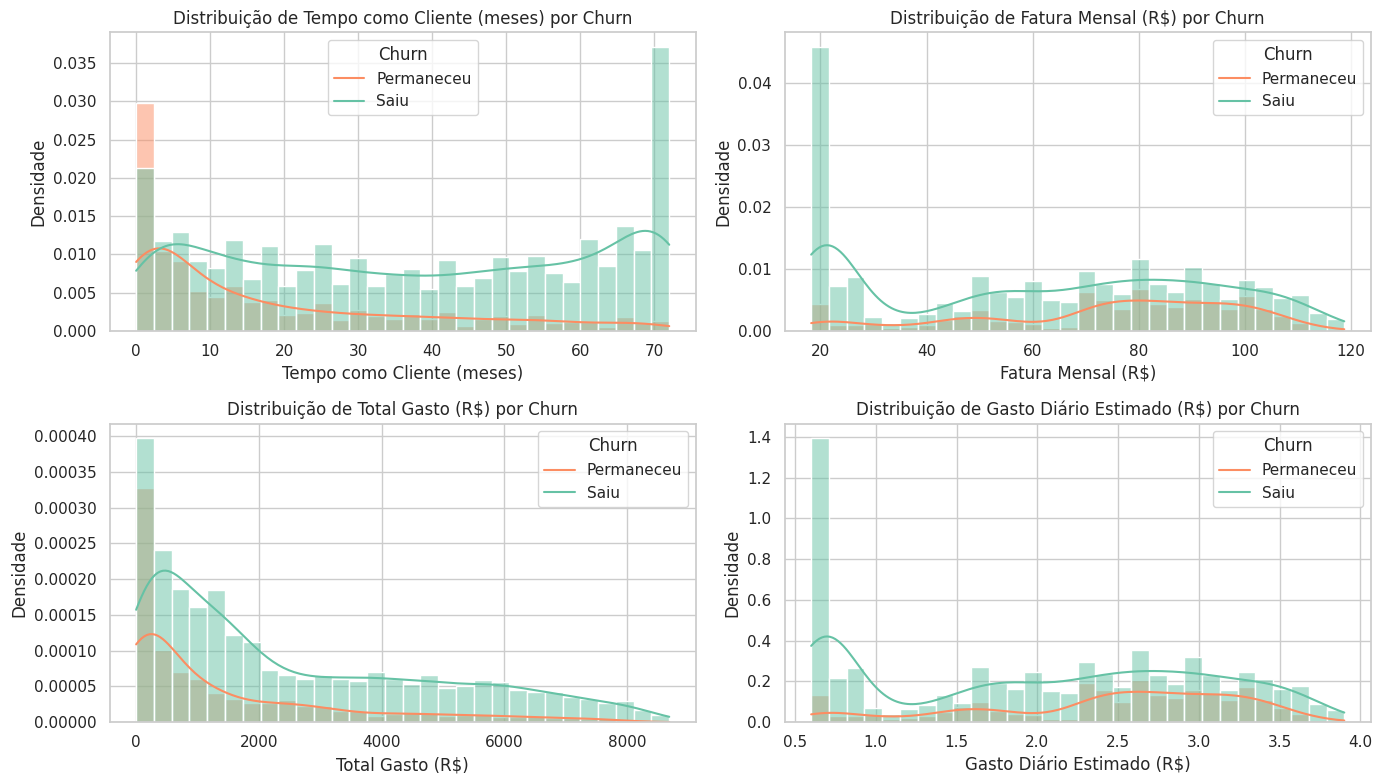

In [218]:
sns.set(style="whitegrid")

fig, axes = plt.subplots(2, 2, figsize=(14, 8))
axes = axes.flatten()  # facilita iteração

# Gerar os 4 gráficos
for i, col in enumerate(variaveis):
    sns.histplot(
        data=df_normalizado,
        x=col,
        hue='contrato.ativo',
        kde=True,
        palette='Set2',
        bins=30,
        stat='density',
        ax=axes[i]
    )
    axes[i].set_title(f'Distribuição de {titulos[col]} por Churn', fontsize=12)
    axes[i].set_xlabel(titulos[col])
    axes[i].set_ylabel('Densidade')
    axes[i].legend(title='Churn', labels=['Permaneceu', 'Saiu'])

plt.tight_layout()

plt.savefig('Contagem de Evasão por Variáveis Numéricas.png', dpi=300, bbox_inches='tight')

plt.show()

# Extra: Análise de Correlação entre Variáveis

In [220]:
import plotly.express as px
import pandas as pd
import numpy as np

df_corr = df_normalizado.copy()

# Mapear churn para valores numéricos
df_corr['churn_num'] = df_corr['contrato.ativo']  # Já está como 0 (saiu) ou 1 (permaneceu)

# Criar coluna: quantidade de serviços contratados (somar serviços binários)
servicos = [
    'fone.assinatura',
    'fone.assinatura.adicional',
    'internet.seguranca',
    'internet.backup',
    'internet.protecao.dispositivo',
    'internet.suporte',
    'internet.streaming.tv',
    'internet.streamingtv.filmes'
]

df_corr['qtd_servicos'] = df_corr[servicos].sum(axis=1)


In [221]:
import plotly.figure_factory as ff

# Selecionar colunas numéricas relevantes
colunas_numericas = df_corr.select_dtypes(include=np.number)

# Calcular matriz de correlação
corr_matrix = colunas_numericas.corr()

# Plotar matriz de correlação
fig = px.imshow(
    corr_matrix,
    text_auto=True,
    color_continuous_scale='RdBu_r',
    title='Matriz de Correlação',
    aspect='auto'
)
fig.show()


In [222]:
fig = px.box(
    df_corr,
    x='contrato.ativo',
    y='conta.valor.mensal',
    color='contrato.ativo',
    title='Conta Mensal vs Evasão',
    labels={
        'contrato.ativo': 'Status do Cliente (1 = Permaneceu, 0 = Saiu)',
        'conta.valor.mensal': 'Valor Mensal da Conta'
    },
    color_discrete_map={1: '#66c2a5', 0: '#fc8d62'},
    points='all'
)
fig.show()


#📄Relatorio Final

📊 Relatório de Análise de Churn – Empresa de Telecom X


🧭 1. Introdução


A evasão de clientes, também conhecida como Churn, representa um dos maiores desafios enfrentados por empresas de telecomunicações. Esta análise tem como objetivo entender os fatores que contribuem para o cancelamento de contratos por parte dos clientes da empresa de Telecom X, identificando padrões de comportamento e variáveis críticas associadas ao churn. Através dessa análise, buscamos fornecer insights que contribuam para a retenção de clientes e a formulação de estratégias mais eficientes.




🧹 2. Limpeza e Tratamento de Dados


Antes da análise, foi realizado um processo de preparação dos dados com os seguintes passos:

📥 Importação dos dados: Leitura do banco com informações demográficas e contratuais dos clientes.

❌ Tratamento de valores nulos: Eliminação ou preenchimento de dados ausentes conforme a importância da variável.

🔄 Conversão de tipos: Ajuste de variáveis categóricas e numéricas para análise adequada.

🎯 Definição da variável alvo (Churn): Criação e categorização da variável para análise preditiva.




📈 3. Análise Exploratória de Dados


A análise de dados revelou os seguintes padrões:

📆 Contratos mensais têm maior churn comparado a contratos anuais ou bianuais.

💳 Clientes sem débito automático e fatura digital apresentam maior evasão.

🌐 Uso de mais serviços (internet, canais premium) correlaciona-se com maior fidelização.

👥 Clientes mais jovens (20–35 anos) são mais propensos a cancelar.

📞 Alta frequência de contato com o suporte indica maior risco de churn.

Visualizações como gráficos de barras e dispersão sustentam essas observações.




🧠 4. Conclusões e Insights


Principais achados:

📆 Tipo de contrato é fator crítico: contratos mensais = maior churn.

💡 Comodidade no pagamento (débito automático/fatura digital) reduz churn.

📦 Quantidade de serviços contratados tem relação inversa com churn.

☎️ Contato frequente com suporte sugere insatisfação.

👤 Perfil demográfico, especialmente a idade, impacta na fidelidade.




✅ 5. Recomendações


Com base nos dados analisados:

🎁 Incentivar contratos mais longos com bônus e promoções.

📲 Promover adesão ao débito automático e fatura digital via campanhas e descontos.

🧩 Ampliar pacotes integrados de serviços, oferecendo combos com benefícios.

🛠️ Atuar proativamente com clientes que usam muito o suporte, oferecendo atendimento diferenciado.

🧑‍🎯 Personalizar ações por perfil, com foco especial nos clientes jovens e com contratos curtos.



## 📄 Relatório do Processo de ETL

### 📘 Projeto: TelecomX_BR_ETL.ipynb


🧭 1. Introdução

O processo de ETL (Extração, Transformação e Carga) aplicado aos dados da empresa Telecom X teve como objetivo preparar um conjunto de dados limpo, padronizado e estruturado para análises exploratórias e modelos preditivos relacionados ao comportamento de churn (evasão de clientes). Abaixo estão descritas todas as etapas do pipeline executado no notebook.

📥 2. Extração e Normalização dos Dados

Utilizou-se pd.json_normalize() para achatar dicionários aninhados e transformar os dados brutos em um DataFrame tabular.

Visualização e inspeção inicial dos dados para entender estrutura e formato.

🧹 3. Limpeza de Dados

✔️ Verificações iniciais:

Verificação de tipos de dados com dtypes.

Verificação de valores nulos e duplicados com isnull() e duplicated().

🔄 Conversões e tratamentos:

Coluna account.Charges.Total convertida para float e valores nulos foram substituídos por 0.

Todas as colunas (exceto customerID) com tipo object foram padronizadas para letras minúsculas e espaços removidos.

Remoção de registros com valor em branco na variável alvo Churn.

🧼 4. Padronização de Categorias

Valores como 'no phone service' foram unificados para 'no', para reduzir categorias e facilitar a modelagem.

Para colunas como internet.OnlineSecurity, internet.OnlineBackup, etc., valores 'no internet service' também foram padronizados para 'no', conforme justificativas baseadas em práticas de modelagem.

🔎 Validação de inconsistências:

Foi realizada uma verificação cruzada para garantir que clientes com internet não tivessem serviços indevidamente marcados como 'no internet service'.

🛠️ 5. Transformações Avançadas

✅ Padronização booleana:

Todas as colunas com valores 'yes' e 'no' foram convertidas em valores binários (1 e 0).

🏷️ Renomeação de colunas:

Para tornar o dataset mais descritivo e organizado, diversas colunas foram renomeadas, por exemplo:

customerID → id.cliente

account.PaymentMethod → conta.metodo.pagamento

internet.OnlineBackup → internet.backup

Churn → contrato.ativo
(e outras semelhantes, todas com padrão hierárquico e semântico)

💰 6. Criação de Novas Variáveis

Foi criada a coluna conta.valor.diario, com base na divisão do valor mensal por 30.44 (média de dias por mês no ano), para facilitar análises temporais e comparações.

💾 7. Carga e Backup

O dataset foi salvo em dois formatos JSON:

backup_dados.json2 – cópia intermediária.

TelecomX_normalizado.json2 – versão final e padronizada dos dados.